Image Approximation with Fourier and Wavelets
=============================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This numerical tour overviews the use of Fourier and wavelets for image
approximation.

In [1]:
#from __future__ import division

#import numpy as np
#import scipy as scp
#import pylab as pyl
#import matplotlib.pyplot as plt

#from nt_toolbox.general import *
#from nt_toolbox.signal import *

#import warnings
#warnings.filterwarnings('ignore')

#%matplotlib inline
#%load_ext autoreload
#%autoreload 2

using PyPlot
using NtToolBox
using Autoreload
arequire("NtToolBox")

  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:1
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:1
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:7
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:7
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:12
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21
  likely near In[1]:21


*Note:* to measure the error of an image $f$ with its
approximation $f_M$, we use the SNR measure, defined as

$$ \text{SNR}(f,f_M) = -20\log_{10} \pa{ \frac{ \norm{f-f_M} }{ \norm{f} } },  $$

which is a quantity expressed in decibels (dB).
The higer the SNR, the better the quality.

Image Loading and Displaying
----------------------------


First we load an image $ f \in \RR^N $ of $ N = N_0 \times N_0 $ pixels.

In [2]:
n0 = 512
f = rescale(load_image("NtToolBox/src/data/lena.png", n0));

  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31


Display the original image.

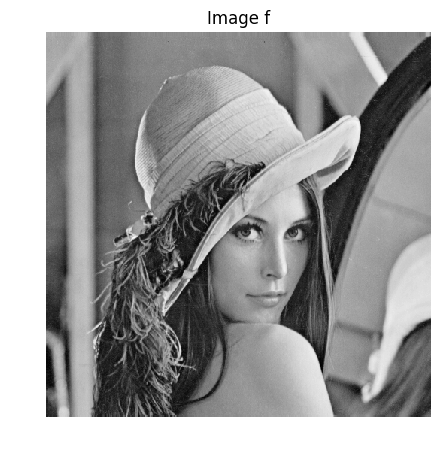

PyObject <matplotlib.text.Text object at 0x000000001E8E6B00>

In [3]:
figure(figsize = (5,5))
imageplot(f, "Image f")

Display a zoom in the middle.

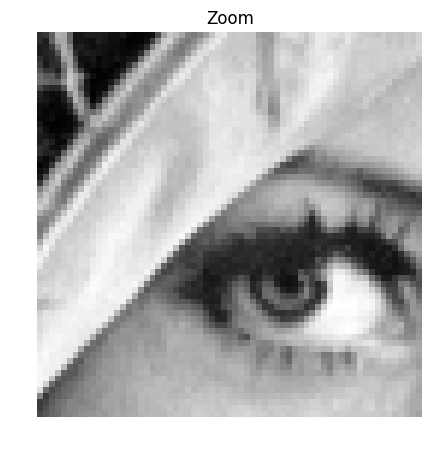

PyObject <matplotlib.text.Text object at 0x000000001E84D160>

In [4]:
figure(figsize = (5,5))
imageplot(f[Int(n0/2 - 32) : Int(n0/2 + 32), Int(n0/2 - 32) : Int(n0/2 + 32)], "Zoom")

An image is a 2D array, it can be modified as a matrix.

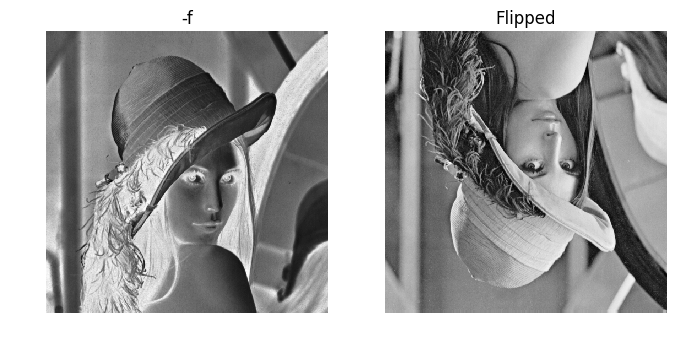

PyObject <matplotlib.text.Text object at 0x000000001ED564A8>

In [5]:
figure(figsize = (8,8))
imageplot(-f, "-f", [1, 2, 1])
imageplot(f[end:-1:1, :], "Flipped", [1, 2, 2])

Blurring is achieved by computing a convolution $f \star h$ with a kernel $h$.


Compute the low pass kernel.

In [6]:
k = 9; #size of the kernel
h = ones(k, k)
h = h/sum(h) #normalize

9×9 Array{Float64,2}:
 0.0123457  0.0123457  0.0123457  …  0.0123457  0.0123457  0.0123457
 0.0123457  0.0123457  0.0123457     0.0123457  0.0123457  0.0123457
 0.0123457  0.0123457  0.0123457     0.0123457  0.0123457  0.0123457
 0.0123457  0.0123457  0.0123457     0.0123457  0.0123457  0.0123457
 0.0123457  0.0123457  0.0123457     0.0123457  0.0123457  0.0123457
 0.0123457  0.0123457  0.0123457  …  0.0123457  0.0123457  0.0123457
 0.0123457  0.0123457  0.0123457     0.0123457  0.0123457  0.0123457
 0.0123457  0.0123457  0.0123457     0.0123457  0.0123457  0.0123457
 0.0123457  0.0123457  0.0123457     0.0123457  0.0123457  0.0123457

Compute the convolution $f \star h$.

In [7]:
fh = conv2(Array{Float64, 2}(f), h)

520×520 Array{Float64,2}:
 0.00830737  0.0166147   0.0249221   …  0.0231914  0.0144802  0.00651898
 0.0166147   0.0332295   0.0498442      0.0463828  0.0289604  0.013038  
 0.0249221   0.0498442   0.0747664      0.0695743  0.0434406  0.0195569 
 0.0332295   0.066459    0.0996885      0.0927657  0.0579209  0.0260759 
 0.0415369   0.0830737   0.124611       0.115957   0.0724011  0.0325949 
 0.0499596   0.0999192   0.14959     …  0.131033   0.0811315  0.0361909 
 0.0582093   0.116419    0.174455       0.139975   0.0863236  0.0386139 
 0.0664013   0.132803    0.1988         0.145687   0.0901888  0.0402869 
 0.0743625   0.148725    0.222857       0.150706   0.0936502  0.0420753 
 0.0740164   0.148033    0.221934       0.132187   0.0821699  0.0369986 
 0.0737279   0.147456    0.221068    …  0.114361   0.0714973  0.0323834 
 0.0734395   0.146879    0.220203       0.0959578  0.0602477  0.0275951 
 0.0732664   0.146533    0.219626       0.0780162  0.0493443  0.0229222 
 ⋮                       

Display.

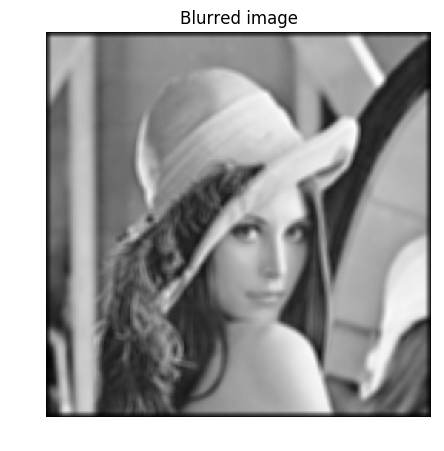

PyObject <matplotlib.text.Text object at 0x000000001EE85320>

In [8]:
figure(figsize = (5,5))
imageplot(fh, "Blurred image")

Fourier Transform
-----------------
The Fourier orthonormal basis is defined as
$$ \psi_m(k) = \frac{1}{\sqrt{N}}e^{\frac{2i\pi}{N_0} \dotp{m}{k} } $$
where $0 \leq k_1,k_2 < N_0$ are position indexes,
and $0 \leq m_1,m_2 < N_0$ are frequency indexes.


The Fourier transform $\hat f$ is the projection of the image on this Fourier
basis

$$ \hat f(m) = \dotp{f}{\psi_m}. $$


The Fourier transform is computed in $ O(N \log(N)) $ operation using the FFT algorithm
(Fast Fourier Transform).
Note the normalization by $\sqrt{N}=N_0$ to make the transform orthonormal.

In [9]:
F = plan_fft(f)
F = (F*f)/n0

512×512 Array{Complex{Float32},2}:
    256.476+0.0im        -3.95615+20.4749im   …   -3.95615-20.4749im 
  0.0844855-11.1962im    -15.1921+13.9858im       0.630981+7.94724im 
   -3.55624-1.76501im    -2.36528-0.595752im       7.28666-0.598839im
    4.73903+1.55932im   -0.805839-5.27302im        6.26791-6.04117im 
  -0.624841-5.30147im     1.55698-1.17529im      -0.988565+0.720974im
   -1.61084-4.77705im    0.165628-1.66687im   …   -2.28491+1.02422im 
    1.22427-0.125188im   -2.10585-2.96785im        1.15793-2.06182im 
    2.86644-0.98837im   -0.248534+1.02317im       -0.55987-1.09585im 
  -0.569311-0.075523im   0.416833-0.219624im       1.58716-0.4015im  
   0.993204-1.84695im    -1.48726-0.244343im      -1.33509+0.742391im
 -0.0138412-0.112531im  -0.682093-1.73745im   …    1.08995-0.3994im  
    0.83187-1.05805im    0.247246+0.45962im       0.700845-0.604206im
  -0.225175+0.184748im  -0.398911-0.745511im       1.23564-0.586102im
           ⋮                                  ⋱        

We check this conservation of the energy.

In [10]:
println(@sprintf("Energy of Image:   %f", norm(f)))
println(@sprintf("Energy of Fourier:   %f", norm(F)))

Energy of Image:   262.554108
Energy of Fourier:   262.554138


Compute the logarithm of the Fourier magnitude $ \log\left(\abs{\hat f(m)} +
\epsilon\right) $, for some small $\epsilon$.

In [11]:
L = fftshift(log(abs(F) + 1e-1))

512×512 Array{Float32,2}:
 -2.22263  -2.13613  -2.2846   -2.2275   …  -2.2275   -2.2846   -2.13613
 -2.20524  -2.25339  -2.26194  -2.14533     -2.2274   -2.20701  -2.16727
 -2.20634  -2.23409  -2.19394  -2.29619     -2.16088  -2.25066  -2.24465
 -2.21319  -2.28514  -2.25704  -2.25984     -2.11008  -2.19926  -2.19242
 -2.21663  -2.20098  -2.2657   -2.20428     -2.21889  -2.17542  -2.2941 
 -2.22902  -2.17697  -2.22038  -2.19271  …  -2.28654  -2.17516  -2.13996
 -2.22738  -2.1867   -2.14879  -2.20321     -2.26124  -2.20302  -2.11106
 -2.24976  -2.19271  -2.22961  -2.21817     -2.17068  -2.25378  -2.22941
 -2.16005  -2.11057  -2.27793  -2.08118     -2.22947  -2.23754  -2.28634
 -2.1473   -2.18849  -2.18699  -2.15036     -2.1783   -2.29059  -2.2841 
 -2.25382  -2.16019  -2.22127  -2.19619  …  -2.27501  -2.20996  -2.2211 
 -2.24757  -2.20535  -2.25617  -2.21006     -2.19404  -2.09374  -2.17059
 -2.17976  -2.17071  -2.13844  -2.23593     -2.26239  -2.25548  -2.21712
  ⋮                      

Display. Note that we use the function fftshift to put the 0 low frequency in the
middle.

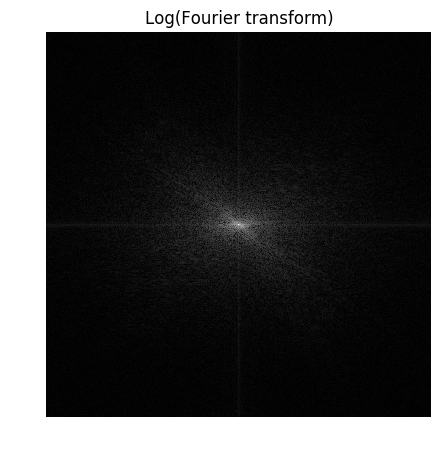

PyObject <matplotlib.text.Text object at 0x000000001F277B00>

In [12]:
figure(figsize = (5,5))
imageplot(L, "Log(Fourier transform)")

Linear Fourier Approximation
----------------------------
An approximation is obtained by retaining a certain set of index $I_M$

$$ f_M = \sum_{ m \in I_M } \dotp{f}{\psi_m} \psi_m. $$


Linear approximation is obtained by retaining a *fixed* set $I_M$
of $M = \abs{I_M}$ coefficients. The important point is that $I_M$
does not depend on the image $f$ to be approximated.


For the Fourier transform, a low pass linear approximation
is obtained by keeping only the frequencies within a square.

$$ I_M = \enscond{m=(m_1,m_2)}{ -q/2 \leq m_1,m_2 < q/2 } $$
where $ q = \sqrt{M} $.


This can be achieved by computing the Fourier transform,
setting to zero the $N-M$ coefficients outside the square $I_M$
and then inverting the Fourier transform.


Number $M$ of kept coefficients.

In [13]:
M = Base.div(n0^2, 64)

4096

__Exercise 1__

Perform the linear Fourier approximation with $M$ coefficients.
Store the result in the variable $f_M$.

In [14]:
#run -i nt_solutions/introduction_4_fourier_wavelets/exo1
include("introduction_4_fourier_wavelets\ exo1.jl")

LoadError: could not open file /Users/quentin/Documents/4_Projets/3_Etude_JE/Julia/introduction_4_fourier_wavelets exo1.jl

In [15]:
## Insert your code here.

Compare two 1D profile (lines of the image).
This shows the strong ringing artifact of the linea approximation.

In [16]:
figure(figsize = (7, 6))

subplot(2, 1, 1)
plot(f[: , Base.div(n0, 2)])
xlim(0, n0)
title("f")

subplot(2, 1, 2)
plot(fM[: , Base.div(n0, 2)])
xlim(0, n0)
title("f_M")

show()

LoadError: UndefVarError: fM not defined

Non-linear Fourier Approximation
--------------------------------
Non-linear approximation is obtained by keeping the $M$ largest
coefficients. This is equivalently computed using a thresholding of the
coefficients
$$ I_M = \enscond{m}{ \abs{\dotp{f}{\psi_m}}>T }. $$


Set a threshold $T>0$.

In [14]:
T = .2;

Compute the Fourier transform.

In [15]:
F = plan_fft(f)
F = (F*f)/n0;

Do the hard thresholding.

In [16]:
#abs(F) .> T
FT = F .* (abs(F) .> T);

Display. Note that we use the function fftshift to put the 0 low frequency in the
middle.

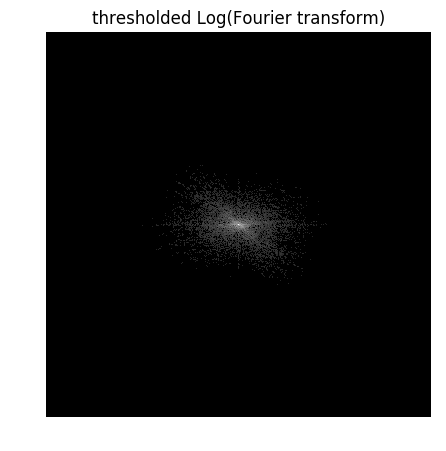

PyObject <matplotlib.text.Text object at 0x0000000025EE5438>

In [17]:
L = fftshift(log(abs(FT) + 1e-1))
figure(figsize = (5,5))
imageplot(L, "thresholded Log(Fourier transform)")

Inverse Fourier transform to obtain $f_M$.

In [18]:
fM = plan_ifft(FT)
fM = real(n0*(fM*FT));

Display.

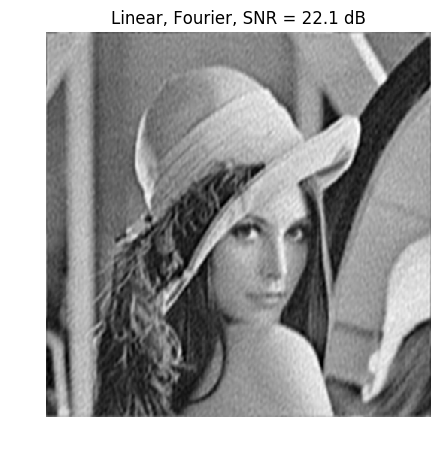

PyObject <matplotlib.text.Text object at 0x000000002619DA90>

In [19]:
figure(figsize = (5,5))
imageplot(clamP(fM), @sprintf("Linear, Fourier, SNR = %.1f dB", snr(f, fM)))

Given a $T$, the number of coefficients is obtained by counting the
non-thresholded coefficients $ \abs{I_M} $.

In [20]:
m = sum(FT .!= 0)
print(@sprintf("M/N = 1/%d" ,(n0^2)/m))

M/N = 1/31

__Exercise 2__

Compute the value of the threshold $T$ so that the number of
coefficients is $M$. Display the corresponding approximation
$f_M$.

In [24]:
#run -i nt_solutions/introduction_4_fourier_wavelets/exo2
include("introduction_4_fourier_wavelets\ exo2.jl")


LoadError: could not open file /Users/quentin/Documents/4_Projets/3_Etude_JE/Julia/introduction_4_fourier_wavelets exo2.jl

In [25]:
## Insert your code here.

Wavelet Transform
-----------------
A wavelet basis $ \Bb = \{ \psi_m \}_m $
is obtained over the continuous domain by translating and
dilating three mother wavelet functions $ \{\psi^V,\psi^H,\psi^D\} $.


Each wavelet atom is defined as
$$ \psi_m(x) = \psi_{j,n}^k(x) = \frac{1}{2^j}\psi^k\pa{ \frac{x-2^j n}{2^j} } $$

The scale (size of the support) is $2^j$ and the position is
$2^j(n_1,n_2)$. The index is $ m=(k,j,n) $ for $\{ j \leq 0 \}$.


The wavelet transform computes all the inner products
$ \{ \dotp{f}{\psi_{j,n}^k} \}_{k,j,n} $.


Set the minimum scale for the transform to be 0.

In [21]:
Jmin = 0;

Perform the wavelet transform,  $f_w$ stores all the wavelet coefficients.

In [22]:
fw = NtToolBox.perform_wavelet_transf(f, Jmin, + 1);
#xf = f[1:2^(5+1), 1:2^(5+1)]
#vcat(xf[1:end, :], xf[end, :]')
#xf[1:end, :]
#xf[end, :]

512×512 Array{Float32,2}:
 260.699        17.7005       -11.932        …   0.0374025    -0.125317  
 -24.4527        1.57447      -14.2721           0.0370831    -0.122444  
  -4.41654      14.5837         1.60971          0.0364369    -0.130496  
  -6.88045      -2.49392       -3.37559          0.000704614  -0.0419324 
   0.850178     -2.0469        -0.165711        -0.0208471    -0.0024046 
  -0.334239      5.67381       -9.23927      …  -0.0114849     0.00260743
  -0.45224      -0.560716       5.35115          0.000758173   0.0136421 
   4.92688      -5.87634        9.30895         -0.00292666   -0.00560339
   0.93541       0.201458       0.00422506      -0.043376      0.0180203 
  -3.12512       0.122966      -0.473662         0.00294668    0.0389428 
   0.295174      0.361619       0.168442     …   0.0172841     0.021358  
  -0.26721      -0.163369       0.348265         0.00608387    0.0119583 
  -0.637094      0.747106      -1.44393         -0.0033948     0.0305497 
   ⋮        

Display the transformed coefficients.

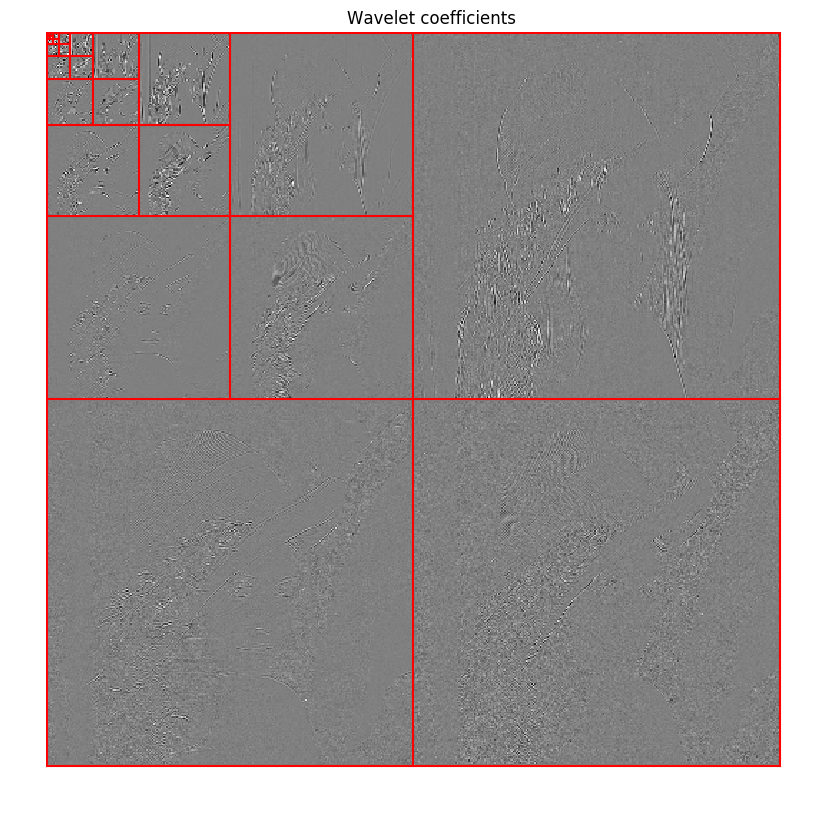

PyObject <matplotlib.text.Text object at 0x00000000263BC6A0>

In [23]:
figure(figsize = (10, 10))

NtToolBox.plot_wavelet(fw)
title("Wavelet coefficients")


Wavelet Approximation
---------------------
Linear wavelet approximation with $M=2^{-j_0}$ coefficients is obtained
by keeping only the coarse scale (large support) wavelets:

$$ I_M = \enscond{(k,j,n)}{ j \geq j_0 }. $$


It corresponds to setting to zero all the coefficients excepted those
that are on the upper left corner of $f_w$.

__Exercise 3__

Perform linear approximation with $M$ wavelet coefficients.

In [36]:
run -i nt_solutions/introduction_4_fourier_wavelets/exo3

LoadError: syntax: extra token "nt_solutions" after end of expression

In [37]:
## Insert your code here.

A non-linear approximation is obtained by keeping the $M$ largest wavelet
coefficients.


As already said, this is equivalently computed by a non-linear hard
thresholding.


Select a threshold.

In [24]:
T = .15

0.15

Perform hard thresholding.

In [25]:
fwT = fw*(abs(fw) .> T);

Display the thresholded coefficients.

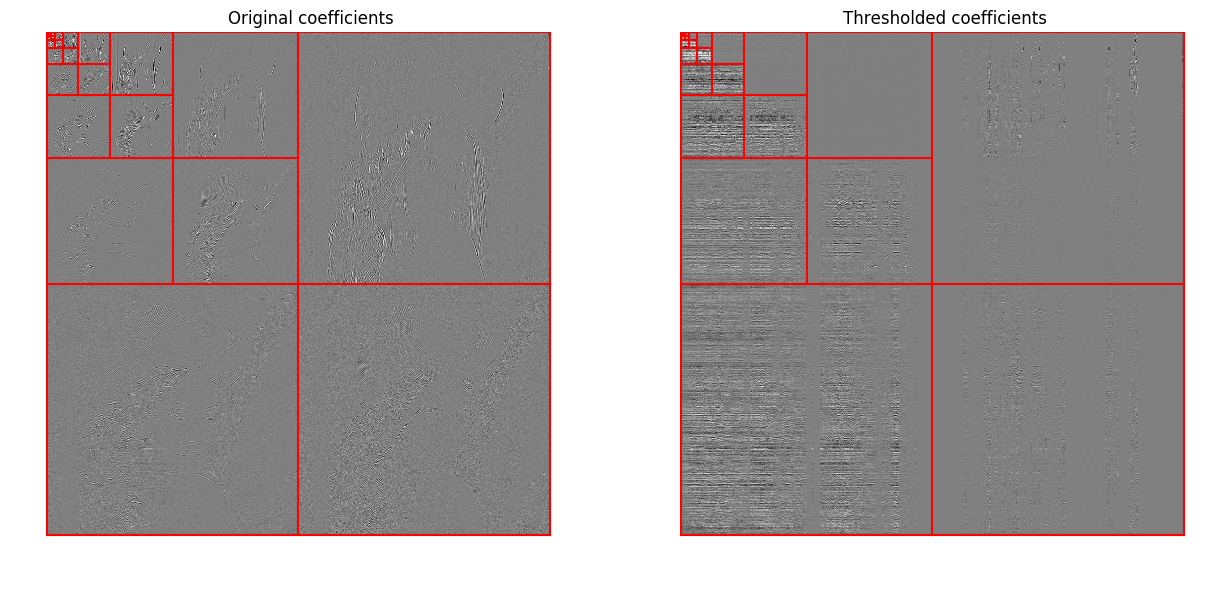

In [26]:
figure(figsize = (15,15))

subplot(1, 2, 1)
plot_wavelet(fw)
title("Original coefficients")

subplot(1, 2, 2)
plot_wavelet(fwT)
title("Thresholded coefficients")

show()

Perform reconstruction.

In [27]:
fM = perform_wavelet_transf(fwT, Jmin, -1)
# x = copy(fwT)
# a = transpose(x[:, 1])
# fin = length(a)
# d = x[Int(fin/2) + 1: end, :].*h[end]
# x = x[1:Int(fin/2), :]./h[end]

LoadError: BoundsError: attempt to access 0×2 Array{Float32,2} at index [1,Colon()]

Display approximation.

In [67]:
plt.figure(figsize=(5,5))
imageplot(clamp(fM), "Approximation, SNR,  = %.1f dB" %snr(f, fM))

LoadError: type PyObject has no field figure

__Exercise 4__

Perform non-linear approximation with $M$ wavelet coefficients by
chosing the correct value for $T$. Store the result in the variable
$f_M$.

In [43]:
run -i nt_solutions/introduction_4_fourier_wavelets/exo4

LoadError: syntax: extra token "nt_solutions" after end of expression

In [44]:
## Insert your code here.

Compare two 1D profile (lines of the image).
Note how the ringing artifacts are reduced compared to the Fourier
approximation.

In [45]:
plt.figure(figsize=(7,6))

plt.subplot(2, 1, 1)
plt.plot(f[:,n0//2])
plt.title('f')

plt.subplot(2, 1, 2)
plt.plot(fM[:,n0//2])
plt.title('f_M')

plt.show()

LoadError: type PyObject has no field figure